In [30]:
import pandas as pd

tabela = pd.read_csv("barcos_ref.csv")
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


### Conseguir prever o preço de barcos que vamos vender baseado nas características do barco: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

In [31]:
display(tabela.corr()[["Preco"]])

,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


In [ ]:
!pip install seaborn

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

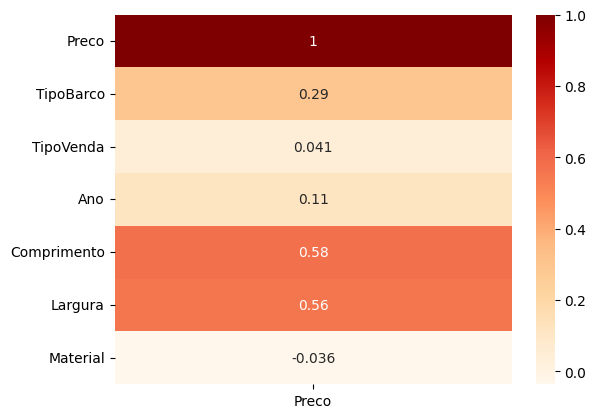

In [34]:
# sns.heatmap - cria um mapa de calor usando a biblioteca seaborn
sns.heatmap(tabela.corr()[["Preco"]], annot=True, cmap="OrRd")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
y = tabela["Preco"]
x = tabela.drop("Preco", axis=1)


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [38]:
# cria as inteligencias aritificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligencias artificias
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [39]:
from sklearn import metrics

In [40]:
# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.4490324760735811
0.8505270337989


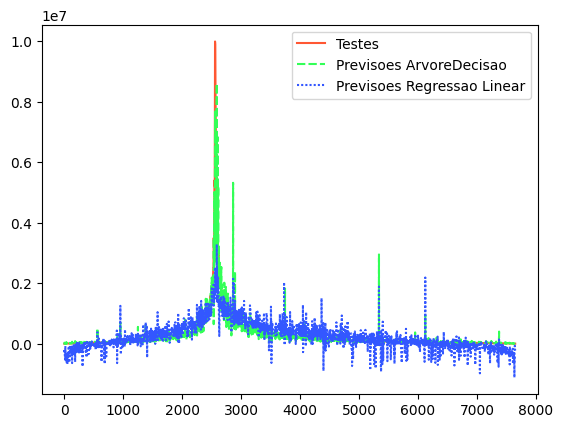

In [41]:
cores = ["#FF5733", "#33FF57", "#3357FF"]

tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["Testes"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

sns.lineplot(data=tabela_auxiliar, palette=cores)
plt.show()

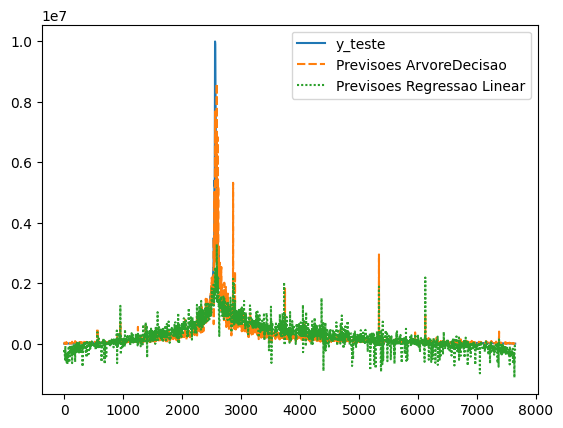

In [42]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

# plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

In [43]:
nova_tabela = pd.read_csv("novos_barcos.csv")
display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 5774.81065476  9195.76333333 18647.35      ]
